In [1]:
import pandas as pd
import nltk
from textblob import TextBlob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


In [2]:
data = pd.read_csv(r"C:\Users\befekadum\Documents\10x acadamy\Week 1\project\week1\raw_analyst_ratings.csv")

In [3]:
data.rename(columns={"date": "Date"}, inplace=True)

In [4]:
data.head()

,Unnamed: 0,headline,url,publisher,Date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [5]:
data['Date'] = data['Date'].str.split(' ').str[0]


In [6]:
data.head()

,Unnamed: 0,headline,url,publisher,Date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A


In [7]:

company_to_filter = 'TSLA'
data_filtered =data[data['stock'] == company_to_filter]

In [8]:
data_filtered.head()

,Unnamed: 0,headline,url,publisher,Date,stock
1255221,1261140,Tesla's Stock Closes At All-Time High As Musk ...,https://www.benzinga.com/news/20/06/16225150/t...,Drew Levine,2020-06-10,TSLA
1255222,1261141,'Tesla factory workplace safety is 5% better t...,https://www.benzinga.com/news/20/06/16225621/t...,Benzinga Newsdesk,2020-06-10,TSLA
1255223,1261142,'Tesla hacker unlocks Performance upgrade and ...,https://www.benzinga.com/news/20/06/16224205/t...,Benzinga Newsdesk,2020-06-10,TSLA
1255224,1261143,GM On Track To Spend $20B On EV And AV Develop...,https://www.benzinga.com/news/20/06/16223414/g...,Benzinga Newsdesk,2020-06-10,TSLA
1255225,1261144,"Tesla's Journey To $1,000 In 2020",https://www.benzinga.com/news/20/06/16222035/t...,Wayne Duggan,2020-06-10,TSLA


In [9]:
# Function to get the sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [10]:
data_filtered.head()

,Unnamed: 0,headline,url,publisher,Date,stock
1255221,1261140,Tesla's Stock Closes At All-Time High As Musk ...,https://www.benzinga.com/news/20/06/16225150/t...,Drew Levine,2020-06-10,TSLA
1255222,1261141,'Tesla factory workplace safety is 5% better t...,https://www.benzinga.com/news/20/06/16225621/t...,Benzinga Newsdesk,2020-06-10,TSLA
1255223,1261142,'Tesla hacker unlocks Performance upgrade and ...,https://www.benzinga.com/news/20/06/16224205/t...,Benzinga Newsdesk,2020-06-10,TSLA
1255224,1261143,GM On Track To Spend $20B On EV And AV Develop...,https://www.benzinga.com/news/20/06/16223414/g...,Benzinga Newsdesk,2020-06-10,TSLA
1255225,1261144,"Tesla's Journey To $1,000 In 2020",https://www.benzinga.com/news/20/06/16222035/t...,Wayne Duggan,2020-06-10,TSLA


In [12]:
data_filtered.loc[:, 'sentiment'] = data_filtered['headline'].apply(get_sentiment)

In [13]:
data_filtered.head()

,Unnamed: 0,headline,url,publisher,Date,stock,sentiment
1255221,1261140,Tesla's Stock Closes At All-Time High As Musk ...,https://www.benzinga.com/news/20/06/16225150/t...,Drew Levine,2020-06-10,TSLA,0.193636
1255222,1261141,'Tesla factory workplace safety is 5% better t...,https://www.benzinga.com/news/20/06/16225621/t...,Benzinga Newsdesk,2020-06-10,TSLA,0.183333
1255223,1261142,'Tesla hacker unlocks Performance upgrade and ...,https://www.benzinga.com/news/20/06/16224205/t...,Benzinga Newsdesk,2020-06-10,TSLA,0.000000
1255224,1261143,GM On Track To Spend $20B On EV And AV Develop...,https://www.benzinga.com/news/20/06/16223414/g...,Benzinga Newsdesk,2020-06-10,TSLA,0.000000
1255225,1261144,"Tesla's Journey To $1,000 In 2020",https://www.benzinga.com/news/20/06/16222035/t...,Wayne Duggan,2020-06-10,TSLA,0.000000


In [14]:
data_filtered[['Date', 'headline', 'sentiment']].head()

,Date,headline,sentiment
1255221,2020-06-10,Tesla's Stock Closes At All-Time High As Musk ...,0.193636
1255222,2020-06-10,'Tesla factory workplace safety is 5% better t...,0.183333
1255223,2020-06-10,'Tesla hacker unlocks Performance upgrade and ...,0.000000
1255224,2020-06-10,GM On Track To Spend $20B On EV And AV Develop...,0.000000
1255225,2020-06-10,"Tesla's Journey To $1,000 In 2020",0.000000


In [15]:
new_data_filtered = data_filtered.loc[:, ['Date', 'sentiment']]
new_data_filtered.head()

,Date,sentiment
1255221,2020-06-10,0.193636
1255222,2020-06-10,0.183333
1255223,2020-06-10,0.000000
1255224,2020-06-10,0.000000
1255225,2020-06-10,0.000000


In [16]:
stock_data = pd.read_csv(r"C:\Users\befekadum\Documents\10x acadamy\Week 1\project\week1\data\TSLA_historical_data.csv")

In [17]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0


In [18]:
#stock_data= stock_data.index
new_stock_data=pd.DataFrame(stock_data, columns=['Date','Close'])

In [19]:
new_stock_data.head()

,Date,Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000


In [21]:
print(new_stock_data.columns)

Index(['Date', 'Close'], dtype='object')


In [22]:

combined_data= new_data_filtered.set_index('Date').join(new_stock_data.set_index('Date'))
combined_data.head()

,sentiment,Close
Date,,
2020-06-10,0.193636,68.33667
2020-06-10,0.183333,68.33667
2020-06-10,0.000000,68.33667
2020-06-10,0.000000,68.33667
2020-06-10,0.000000,68.33667


In [23]:
print(new_stock_data[['Close']])

           Close
0       1.592667
1       1.588667
2       1.464000
3       1.280000
4       1.074000
...          ...
3540  215.990005
3541  220.250000
3542  219.800003
3543  232.100006
3544  222.619995

[3545 rows x 1 columns]


In [24]:
combined_data.head()

,sentiment,Close
Date,,
2020-06-10,0.193636,68.33667
2020-06-10,0.183333,68.33667
2020-06-10,0.000000,68.33667
2020-06-10,0.000000,68.33667
2020-06-10,0.000000,68.33667


In [25]:
combined_data.tail()

,sentiment,Close
Date,,
2019-07-02,0.000000,14.970000
2019-07-01,0.000000,15.144667
2019-07-01,0.000000,15.144667
2019-07-01,0.066667,15.144667
2019-07-01,0.250000,15.144667


In [26]:
combined_data['Daily Returns'] = combined_data['Close'].pct_change()

C:\Users\befekadum\AppData\Local\Temp\ipykernel_36912\707584225.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  combined_data['Daily Returns'] = combined_data['Close'].pct_change()


In [27]:
correlation = combined_data['sentiment'].corr(combined_data['Daily Returns'])
print("Correlation between sentiment and daily stock returns:", correlation)

Correlation between sentiment and daily stock returns: -0.02500622755242186


In [28]:
correlation = combined_data['sentiment'].corr(combined_data['Close'])
print("Correlation between sentiment and closing:", correlation)

Correlation between sentiment and closing: -0.02632867605746522


In [30]:

combined_data['Daily Returns'] = combined_data['Close'].pct_change()



C:\Users\befekadum\AppData\Local\Temp\ipykernel_36912\1301541418.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  combined_data['Daily Returns'] = combined_data['Close'].pct_change()


In [31]:
correlation_matrix = combined_data.corr()

In [32]:
# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               sentiment     Close  Daily Returns
sentiment       1.000000 -0.026329      -0.025006
Close          -0.026329  1.000000       0.023657
Daily Returns  -0.025006  0.023657       1.000000


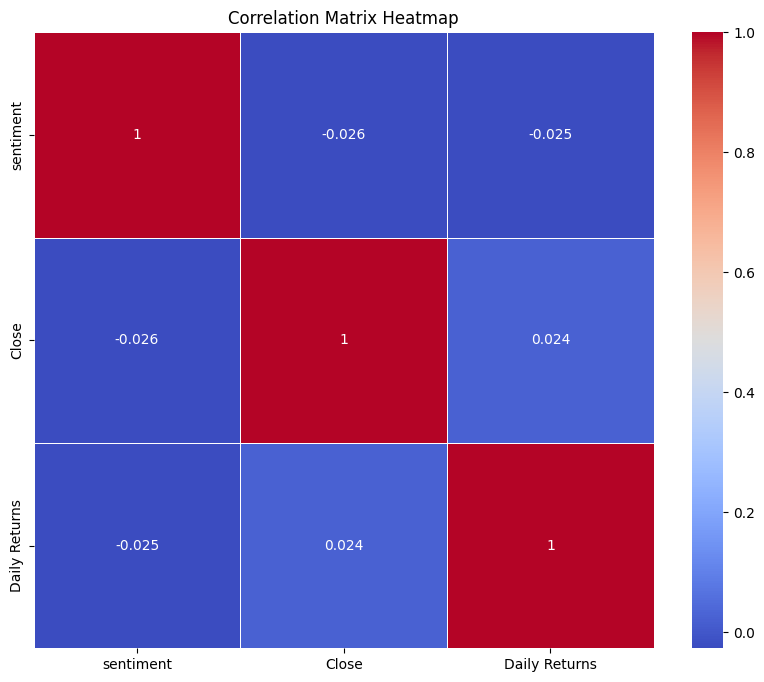

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()